# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [1]:
from pandas_datareader import data as web
import yfinance as yf

import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np

import os

In [2]:
#1.1 - Importando dados 'BBDC3.SA', 'EMBR3.SA', 'GGBR4.SA' a partir de 14/02/2024
ativos = ['BBDC3.SA', 'EMBR3.SA', 'GGBR4.SA']
dt_ini = '2023-02-10'
dt_fim = '2025-02-10'

df_ativos = yf.download(ativos, start=dt_ini, end=dt_fim)
df_ativos.head()

[*********************100%***********************]  3 of 3 completed


Price           Close                             High                        \
Ticker       BBDC3.SA   EMBR3.SA   GGBR4.SA   BBDC3.SA   EMBR3.SA   GGBR4.SA   
Date                                                                           
2023-02-10  10.015411  16.120001  20.223600  10.231447  16.459999  20.837735   
2023-02-13  10.309220  16.000000  20.416409  10.326503  16.200001  20.487819   
2023-02-14  10.283297  16.240000  20.466394  10.412918  16.340000  20.844873   
2023-02-15  10.482047  16.420000  20.380705  10.559820  16.450001  20.573516   
2023-02-16  10.559823  16.240000  20.609219  10.689444  16.400000  20.994838   

Price             Low                             Open                        \
Ticker       BBDC3.SA   EMBR3.SA   GGBR4.SA   BBDC3.SA   EMBR3.SA   GGBR4.SA   
Date                                                                           
2023-02-10   9.877149  15.900000  20.023649  10.015411  16.299999  20.316434   
2023-02-13   9.963563  15.780000  19.573758  10.024053  16.160000  20.016507   
2023-02-14  10.205524  15.950000  20.245021  10.326504  16.070000  20.602077   
2023-02-15  10.205522  16.120001  20.116483  10.257370  16.200001  20.423551   
2023-02-16  10.317863  16.110001  20.459256  10.378353  16.379999  20.459256   

Price         Volume                     
Ticker      BBDC3.SA EMBR3.SA  GGBR4.SA  
Date                                     
2023-02-10  21015100  7474000  22591926  
2023-02-13   8853100  4906500  11853576  
2023-02-14   8694300  5565600  11007864  
2023-02-15  14487500  6523400  11745972  
2023-02-16   9736000  4626500  12189870

In [3]:
#1.2 - Salvando os dados em um arquivo CSV
os.makedirs('input',exist_ok=True)
df_ativos.to_csv('input/df_ativos.csv')

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [3]:
#2.1 - Calculando amplitude por ativo
(df_ativos['High'] - df_ativos['Low']).head()


Ticker,BBDC3.SA,EMBR3.SA,GGBR4.SA
Date,,,
2023-02-10,0.354298,0.559999,0.814086
2023-02-13,0.362940,0.420001,0.914061
2023-02-14,0.207394,0.390000,0.599852
2023-02-15,0.354298,0.330000,0.457032
2023-02-16,0.371582,0.289999,0.535582


In [4]:
#2.2 - Gráfico das amplitudes

amplitude_variacao = np.abs(df_ativos['High'] - df_ativos['Low']).stack().reset_index().rename(columns={'Date':'data','Ticker':'ativo',0:'amplitude'})
amplitude_variacao.head(3)

,data,ativo,amplitude
0,2023-02-10,BBDC3.SA,0.354298
1,2023-02-10,EMBR3.SA,0.559999
2,2023-02-10,GGBR4.SA,0.814086


c:\Users\AlexSA\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


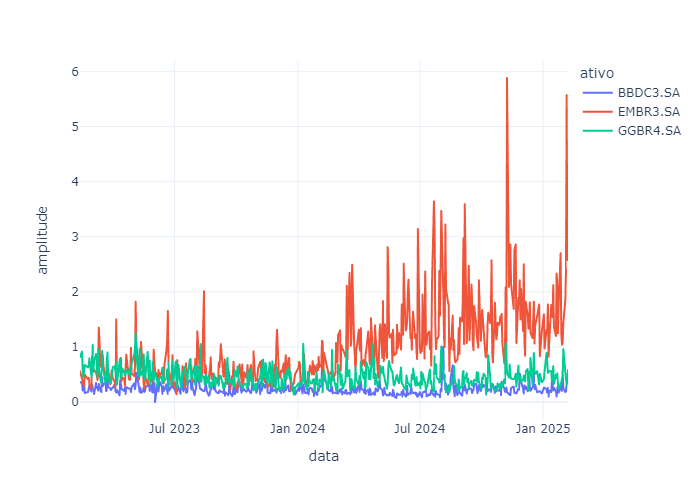

In [5]:

fig = px.line(amplitude_variacao, x="data", y="amplitude", color='ativo', template='plotly_white')
fig.show('png')

In [7]:
#2.3 - Maior volatilidade



fig = px.line(amplitude_variacao, x="data", y="amplitude", color='ativo', template='plotly_white')
fig.show()

print('Maior volatilidade: é do ativo EMBR3.SA')

c:\Users\AlexSA\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Maior volatilidade: é do ativo EMBR3.SA
